# Policy Iteration


## I. Core Functions
### We want to have utility functions that can help us transitioning between states and get rewards from an action.
### We also want to calculate the expected utility of an action given transition-reward dynamics.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 'g' stands for green (+1)
# '0' stands for white (-0.04)
# 'b' stands for brown (-1)
# 'w' stands for walls (Wall)
# 's' stands for start (Start)

#get reward from symbol
def get_reward(position,map):
    symbol = map[position[0]][position[1]]
    if symbol=='g':    
            return 1
    elif symbol=='0':    
            return -0.04
    elif symbol=='b':    
            return -1
    else:
            return 0

#get possible action from position
def get_value(position,state_value):

    return state_value[position[0]][position[1]]

#get destination from position and action
def get_destination(position,action,map):

    if (position[0]+action[0] < 0) or (position[0]+action[0] > 5) or (position[1]+action[1] < 0) or (position[1]+action[1] > 5) or  map[position[0]+action[0]][position[1]+action[1]]=='w':
        new_position= position
    else:
        new_position = [position[0] + action[0], position[1] + action[1]]

    return new_position


def value_of_action(position,action,map):
    if action[0] == 0:
        action1 = [1 ,0]
        action2 = [-1,0]
    else:
        action1 = [0 , 1]
        action2 = [0 ,-1]

    straight_value = get_value(get_destination(position,action,map),state_value)*GAMMA + get_reward(get_destination(position,action,map),map)
    turn_value1 = get_value(get_destination(position,action1,map),state_value)*GAMMA + get_reward(get_destination(position,action1,map),map)
    turn_value2 = get_value(get_destination(position, action2, map),state_value)*GAMMA + get_reward(get_destination(position,action2,map),map)

    average_value = straight_value*0.8 + (turn_value1 + turn_value2)*0.1
    
    #Value of action Q(s,a) = Sigma[ p(r,s')* (V(s')*GAMMA + r(s,a) ]
    
    return average_value


## II. Graphics Functions
### These are graphics functions that will help us print out tables later.

In [2]:
def display_2d_list_with_highlight(matrix, highlight_index):
    cmap = plt.cm.get_cmap("viridis").copy()
    cmap.set_bad(color='grey')  # Set color for highlighted element

    highlighted_matrix = np.array(matrix, dtype=float)
    
    for highlighted_index in highlight_index:
        highlighted_matrix[highlighted_index[0], highlighted_index[1]] = np.nan
        
    plt.imshow(highlighted_matrix, cmap=cmap, interpolation='nearest', vmin=np.nanmin(matrix), vmax=np.nanmax(matrix))
    plt.title("Utility Map through Iterations")
    plt.colorbar()
    plt.show()


def get_wall_list(map):
    wall_list=[]
    for row in range(6):
        for column in range(6):
            if map[row][column] == 'w':
                wall_list.append([row,column])
    return wall_list

def print_state_utility(state_value,wall_list):
    for row in range(6):
        for column in range(6):
            if [row,column] in wall_list:
                print('Wall',end = '\t')
            else:
                print(state_value[row][column], end="\t")  
        print()  

def print_policy(policy_table,wall_list):
    for row in range(6):
        for column in range(6):
            element = policy_table[row][column]
    
            if [row,column] in wall_list:
                print('Wall',end = '\t')
                continue
            elif element == [0,-1]:
                action = 'Left'
            elif element == [0,1]:
                action = 'Right'
            elif element == [-1, 0 ]:
                action = 'Up'
            else:
                action = 'Down'
            print(action,end="\t")  
        print()          
        
#########################################


## III. Problem-specific data
### Here we input our map layout, as well as initializing utility table and policy table.
### We also get our discount factor and accuracy threshold variable for later iterations.

In [3]:
# (row,column) format

map= [
    ['g','w','g','0','0','g'],
    ['0','b','0','g','w','b'],
    ['0','0','b','0','g','0'],
    ['0','0','s','b','0','g'],
    ['0','w','w','w','b','0'],
    ['0','0','0','0','0','0'],
    ]

#initialize_state_value table
state_value = [[0]*6 for i in range(6)]

#initialize policy table
policy_table = [[[0,1] for k in range(6)] for j in range(6)]

#accuracy threshold variable
THETA = 0.01

#Discount factor
GAMMA = 0.99

#Possible Action
action = [
    [0,1], [0,-1], [1,0], [-1,0]
]

## IV. Policy Iteration:
### While the policy is not stable (still changes after an interation):
###     + Iterate through utility table until error of the table goes under the accuracy threshold (Policy Evaluation)
###     + Update the policy to make the best action according to the utility table in each state (Policy Improvement)

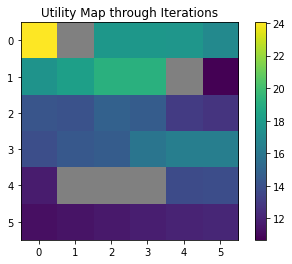

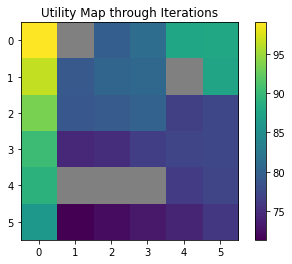

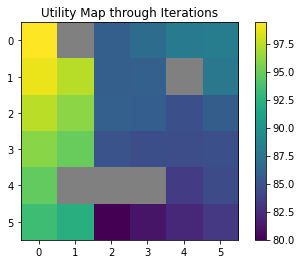

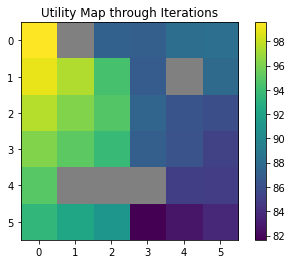

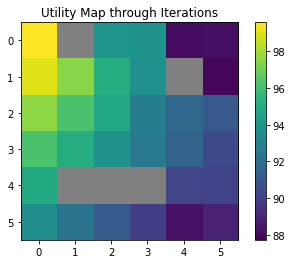

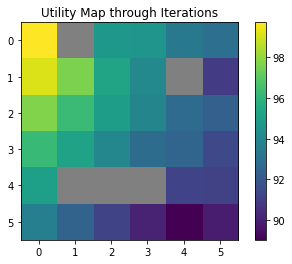

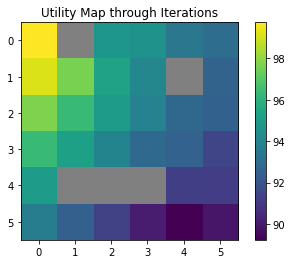

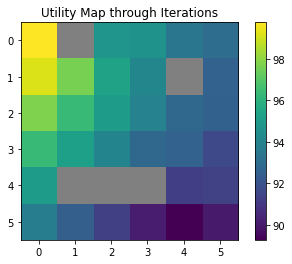

The number of iteration is: 8
826


In [4]:
policy_stable_flag = False
iteration_till_convergence=0
state_sweep_count=0
while not policy_stable_flag:
    #maximum error variable
    ERROR = 1
    while ERROR > THETA:
    #for i in range(30):
        ERROR = 0
        for row in range(6):
            for column in range(6):

                old_v = get_value([row,column],state_value)

                #update state_value

                state_value[row][column] = value_of_action([row,column],policy_table[row][column],map)

                ERROR = max(ERROR,abs(old_v - state_value[row][column]))
        state_sweep_count+=1
    #policy improvement
    policy_stable_flag = True
    for row in range(6):
        for column in range(6):
            old_action = policy_table[row][column]
            max_value= float('-inf')
            for a in action:
                a_value = value_of_action([row,column],a,map)
                if a_value >= max_value:
                    max_value = a_value
                    new_action = a
            policy_table[row][column] = new_action
            if old_action != new_action:
                policy_stable_flag = False
    iteration_till_convergence+=1
    display_2d_list_with_highlight(state_value, get_wall_list(map))
    
print('The number of iteration is:',iteration_till_convergence)
print(state_sweep_count)

## Final Utility Table
### Utility values might not be very accurate because Policy Iteration stops when policy is stable

In [5]:
print_state_utility(state_value,get_wall_list(map))

99.75304562220799	Wall	94.75438125356943	94.6253260058442	93.39492280578024	93.00578788792929	
99.18350012968453	97.62027255539087	95.30222624966754	94.10563174854715	Wall	92.59300196613933	
97.7268208350801	96.3536718212803	95.01538385668596	93.92536219211324	92.8026691714278	92.53230082936216	
96.3207837831786	95.21069700349736	93.98575040409669	92.82030187796111	92.5548035206325	91.57838745634099	
95.06931200743783	Wall	Wall	Wall	91.23737336673057	91.29649426067161	
93.68303221028975	92.464462550738	91.26109279398436	90.07273335738238	89.28033711480165	90.01671363478746	


## Final Policy Table

In [6]:
print_policy(policy_table,get_wall_list(map))

Up	Wall	Left	Left	Left	Up	
Up	Left	Left	Left	Wall	Up	
Up	Left	Left	Up	Left	Left	
Up	Left	Left	Left	Up	Up	
Up	Wall	Wall	Wall	Up	Up	
Up	Left	Left	Left	Up	Up	
